In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
def signal_tracker(ticker, moving_avg_short, moving_avg_long):
    
    #download data
    df = pdr.get_data_yahoo(ticker)
    day = np.arange(1, len(df) + 1)
    df['day'] = day
    df.drop(columns=['Adj Close', 'Volume'], inplace = True)
    df = df[['day', 'Open', 'High', 'Low', 'Close']]

    #add moving averages
    df[f'{moving_avg_short}-day'] = df['Close'].rolling(moving_avg_short).mean()
    df[f'{moving_avg_long}-day'] = df['Close'].rolling(moving_avg_long).mean()

    #add signal column
    df['signal'] = np.where(df[f'{moving_avg_short}-day'] > df[f'{moving_avg_long}-day'], 1, 0)
    df['signal'] = np.where(df[f'{moving_avg_short}-day'] < df[f'{moving_avg_long}-day'], -1, df['signal'])
    df.dropna(inplace=True)

    #calculate instant returns/ system returns
    df['return'] = np.log(df['Close']).diff()
    df['algo_return'] = df['signal'] * df['return']
    df['entry'] = df.signal.diff()
    
    #plot moving avg on time series
    plt.rcParams['figure.figsize'] = 12, 6
    plt.grid(True, alpha = .3)
    plt.plot(df.iloc[-252:]['Close'], label = ticker)
    plt.plot(df.iloc[-252:][f'{moving_avg_short}-day'], label = f'{moving_avg_short}-day')
    plt.plot(df.iloc[-252:][f'{moving_avg_long}-day'], label = f'{moving_avg_long}-day')
    plt.plot(df[-252:].loc[df.entry == 2].index, df[-252:][f'{moving_avg_short}-day'][df.entry == 2], '^',
             color = 'g', markersize = 12, label='Buy')
    plt.plot(df[-252:].loc[df.entry == -2].index, df[-252:][f'{moving_avg_long}-day'][df.entry == -2], 'v',
             color = 'r', markersize = 12, label='Sell')
    plt.legend()
    plt.title(f'{ticker}: Moving Average Signal Graph')
    plt1 = plt.show()

    #plot algorith performance vs buy & hold
    plt.plot(np.exp(df['return']).cumprod(), label='Buy/Hold')
    plt.plot(np.exp(df['algo_return']).cumprod(), label='Algo')
    plt.legend(loc=2)
    plt.grid(True, alpha=.3)
    bh = "{0:.1%}".format(np.exp(df['return']).cumprod()[-1] -1)
    a = "{0:.1%}".format(np.exp(df['algo_return']).cumprod()[-1] -1)
    plt.title(f'{ticker}: Algorithm ({a} Overall Return) vs "Buy & Hold" ({bh} Overall Return)')
    plt2 = plt.show()
    
    return 

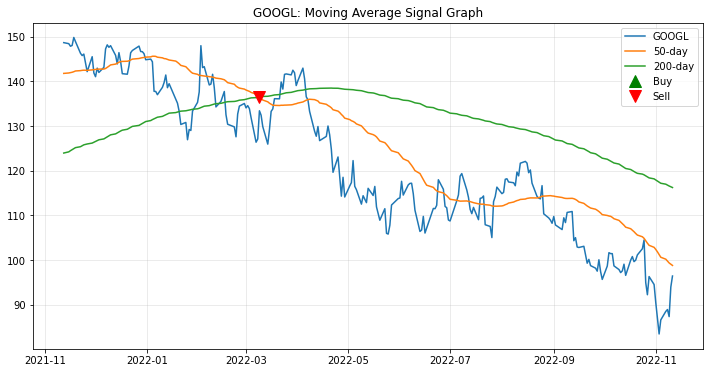

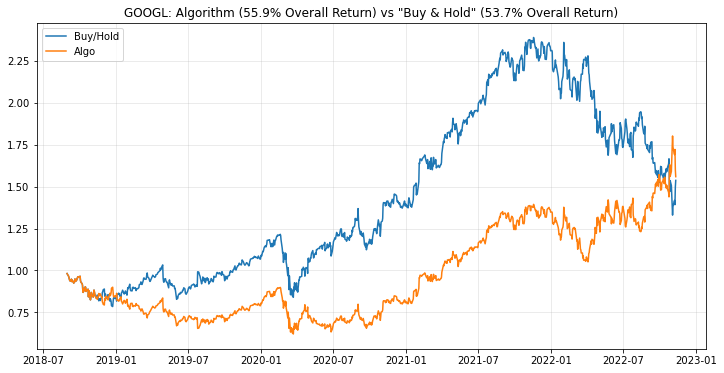

In [33]:
signal_tracker('GOOGL', 50, 200)